In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("salaryData.csv")

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.shape

(30, 2)

In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.min()

YearsExperience        1.1
Salary             37731.0
dtype: float64

In [ ]:
df.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.iloc[2:6]

,YearsExperience,Salary
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

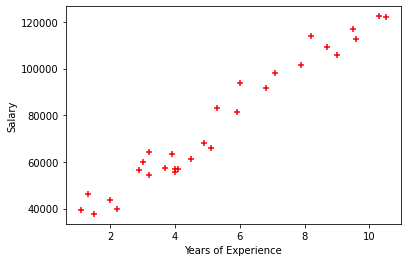

In [ ]:
# visualization using scatter plot
x = df.YearsExperience
y = df.Salary
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='r',marker= '+')
plt.show()

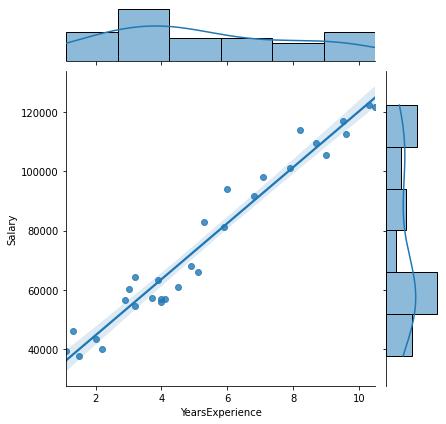

In [ ]:
import seaborn as sns
sns.jointplot(data=df, x= 'YearsExperience'	, y = 'Salary', kind='reg')

In [ ]:
# splitting of the data into training and testing

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X = df[['YearsExperience']]
y = df[['Salary']]

# X = df.iloc[:,:-1].values
# y = df.iloc[:,1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# random state to fix the train and test data always the index location

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
y_pred

array([[115814.30756236],
       [ 71511.92534771],
       [102617.85328566],
       [ 75282.34085534],
       [ 55487.65944028],
       [ 60200.67882482],
       [122412.53470072],
       [107330.8726702 ],
       [ 63028.49045554],
       [ 35692.97802523]])

In [ ]:
# difference of y_pred and y_test (actual)

In [ ]:
lm.predict([[9]])

array([[110158.68430092]])

In [ ]:
lm.coef_

array([[9426.03876907]])

In [ ]:
lm.intercept_

array([25324.33537924])

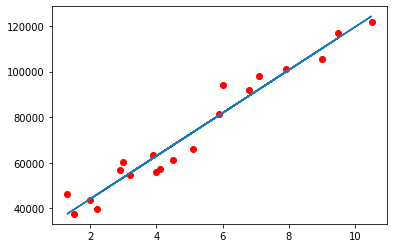

In [ ]:
plt.scatter(X_train,y_train, color = 'r')
plt.plot(X_train,lm.predict(X_train))
plt.show()

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9553063138044949

# Save a model

In [ ]:
# saving the model
#training - train - save
# using joblive and pickle

In [ ]:
# Pickle

import pickle 

In [ ]:
with open ('modelsave_pickle','wb') as file: # w -write , b - binary
  pickle.dump(lm, file)

# Load model and prediction

In [ ]:
with open ('modelsave_pickle', 'rb') as file:
  newmodel = pickle.load(file)

In [ ]:
newmodel.predict([[5]])

array([[72454.52922462]])

In [ ]:
newmodel.coef_

array([[9426.03876907]])

# Joblib

In [ ]:
from sklearn.externals import joblib
joblib.dump(lm,'model_joblib')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model_joblib']

In [ ]:
loaded_model = joblib.load('model_joblib')

In [ ]:
# now you can use this model for prediction

# Gradient

0 0 0 6502955270.733334


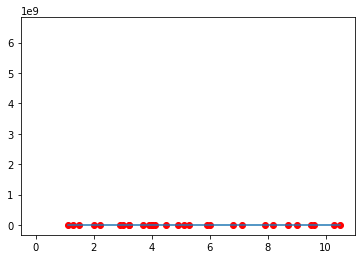

In [ ]:
import math
x = np.array([1,2,3,4,5]) #y = 3x+2
y = np.array([5,8,11,14,17])
def gradient(x,y):
  a=0
  b=0
  rate = 0.01
  n = len(x)
  plt.scatter(x,y,color='red')
  cost_old = 0
  for i in range(1000):
    y_pred = a*x+b
    cost = (1/n)*sum([value**2 for value in (y - y_pred)])
    print(a,b,i,cost)
    plt.plot(x,y_pred, cost)
    ad = -(2/n)*sum(x*(y-y_pred))
    yd = -(2/n)*sum(y-y_pred)
    a = a - rate*ad
    b = b - rate*yd
    if math.isclose(cost,cost_old):
      break
    cost_old = cost
    return a,b

df = pd.read_csv("salaryData.csv")
x = np.array(df['YearsExperience'])
y = np.array(df['Salary'])
m,b = gradient(x,y)